<a href="https://colab.research.google.com/github/whatiddone/MLDL_Study/blob/main/3rd_week(Ch.7).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 7-pre. 📌 신경망을 이해하기 위한 학습 순서

## 1️⃣ 경사 하강법 이해하기
- 경사 하강법이란?
→ 손실 함수(loss function)를 최소화하기 위해 가중치를 반복적으로 조정하는 최적화 알고리즘
- 학습률(learning rate)의 역할
→ 너무 크면 발산, 너무 작으면 학습이 느림
- 배치(batch) 방식에 따른 차이
→ 배치 경사 하강법(Batch GD), 확률적 경사 하강법(SGD), 미니배치 경사 하강법(Mini-batch GD) 비교

## 2️⃣ 퍼셉트론(Perceptron) 이해하기
- 단층 퍼셉트론
→ 가장 간단한 신경망 구조 (입력층 + 출력층)
- 퍼셉트론의 학습
→ 가중치를 경사 하강법으로 업데이트
- 퍼셉트론 한계
→ XOR 문제 해결 불가능 → 다층 퍼셉트론(MLP) 필요

## 3️⃣ 다층 신경망(Multi-layer Perceptron, MLP) 이해하기
- 신경망에서 가중치(W)와 바이어스(B)의 역할
- 활성화 함수(Activation Function)
→ ReLU, Sigmoid, Tanh 등의 필요성
- 순전파(Forward Propagation)와 역전파(Backpropagation) → 역전파는 경사 하강법을 기반으로 작동!

## 4️⃣ 역전파(Backpropagation)와 경사 하강법의 관계
- 순전파(Forward Propagation) → 입력값이 신경망을 통과하여 예측값(출력) 생성
- 손실(loss) 계산 → 예측값과 실제값의 차이 측정
- 역전파(Backpropagation) → 손실 값을 미분하여 각 가중치가 얼마나 영향을 미치는지 계산
- 경사 하강법 적용 → 역전파로 구한 기울기를 이용해 가중치 업데이트
## 📌 결론: 신경망이 제대로 작동하려면, 역전파를 통해 경사 하강법으로 가중치를 조정해야 함!

### XOR 연산이란?
XOR은 두 개의 입력값이 **다를 때 1(True), 같을 때 0(False)**을 출력하는 논리 연산

- XOR 데이터 시각화
  - XOR 데이터의 분포
```scss
(0, 0) → 0 (🔴)        (0, 1) → 1 (🟢)
(1, 0) → 1 (🟢)        (1, 1) → 0 (🔴)
```
🚫 단순한 하나의 직선으로 분리할 수 없음!
  - 그러나 AND와 OR의 경우 하나의 직선으로 분리 가능
  ```scss
  # AND
  (0, 0) → 0 (🔴)        (0, 1) → 0 (🔴)
  (1, 0) → 0 (🔴)        (1, 1) → 1 (🟢)
  ```
  ```scss
  # OR
  (0, 0) → 0 (🔴)        (0, 1) → 1 (🟢)
  (1, 0) → 1 (🟢)        (1, 1) → 1 (🟢)

  ```


# 7-1. 인공신경망

In [ ]:
# 실행마다 동일한 결과를 얻기 위해 케라스에 랜덤 시드를 사용하고 텐서플로 연산을 결정적으로 만듭니다.
import tensorflow as tf

tf.keras.utils.set_random_seed(42)
tf.config.experimental.enable_op_determinism()

> ## 키워드
- 밀집층: 가장 간단한 인공 신경망 층, 모든 입력 노드와 출력 노드가 완전히 연결(fully connected) 되어 있다.
- 원-핫 인코딩: 하나의 차원에서 단 하나의 요소만 1, 나머지는 모두 0. **범주형 변수 처리**에 유용.


> ## 핵심 패키지와 함수
### TensorFlow
- Dense는 신경망에서 가장 기본 층이 밀집층을 만드는 클래스.
  - 첫 번째 매개변수에는 뉴런의 개수를 지정
  - activation 매개변수에는 사용할 활성화 함수(softmax, sigmoid) 지정.
  - 케라스의 Sequential 클래스에 맨 처음 추가되는 층에는 input_shape 매개변수로 입력 크기 지정 필요
- Sequential은 케라스에서 신경망 모델을 만드는 클래스
  - 추가할 층이 1개 이상일 경우 파이썬 리스트로 전달
- compile()은 모델 객체를 만든 후 훈련하기 전에 사용할 손실 함수와 측정 지표 등을 지정하는 메서드
  - loss 매개변수에 손실 함수를 지정합니다. 이진 분류일 경우 'binary_crossentropy', 다중 분류일 경우 'categorical_crossentropy'를 지정합니다. 클래스 레이블이 정수일 경우 'sparse_categorical_crossentropy'로 지정합니다. 회귀 모델일 경우 'mean_square_error'등으로 지정할 수도 있습니다.
  - metrics 매개변수에 훈련 과정에서 측정하고 싶은 지표를 지정할 수 있습니다. 측정 지표가 1개 이상인 경우 리스트로 전달합니다.
- fit()은 모델을 훈련하는 메서드입니다.
- evaluate()는 모델 성능을 평가하는 메서드입니다.
  - compile() 메서드에서 loss 매개변수에 지정한 손실 함수의 값과 metrics 매개변수에서 지정한 측정 지표를 출력합니다.

## 패션 MNIST

In [ ]:
from tensorflow import keras

(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [ ]:
print(train_input.shape, train_target.shape)

(60000, 28, 28) (60000,)


In [ ]:
print(test_input.shape, test_target.shape)

(10000, 28, 28) (10000,)


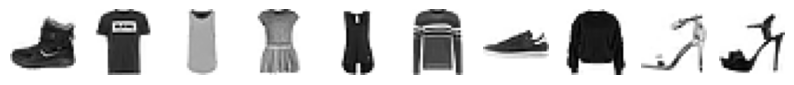

In [ ]:
# 이미지 출력하기
import matplotlib.pyplot as plt
fig, axs = plt.subplots(1, 10, figsize=(10, 10))
for i in range(10):
  axs[i].imshow(train_input[i], cmap='gray_r')
  axs[i].axis('off')
plt.show()

In [ ]:
# 이미지의 타깃값 확인하기
print([train_target[i] for i in range(10)])

[9, 0, 0, 3, 0, 2, 7, 2, 5, 5]


In [ ]:
# 각 레이블마다 몇 개의 샘플이 있는지 확인하기
import numpy as np
print(np.unique(train_target, return_counts=True))

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000]))


## 로지스틱 회귀로 패션 아이템 분류하기

In [ ]:
# 2차원 배열인 각 샘플을 1차원 배열로 펼치기 (SGDClassifier는 2차원 입력을 다루지 못함)
train_scaled = train_input / 255.0
train_scaled = train_scaled.reshape(-1, 28*28)

In [ ]:
print(train_scaled.shape)

(60000, 784)


In [ ]:
from sklearn.model_selection import cross_validate
from sklearn.linear_model import SGDClassifier

sc = SGDClassifier(loss='log_loss', max_iter=5, random_state=42)

scores = cross_validate(sc, train_scaled, train_target, n_jobs=-1)
print(np.mean(scores['test_score']))

0.8194166666666666


- 각 픽셀마다 가중치 넣어 계산하는 방법. 레이블마다 가중치가 다릅니다.

## 인공 신경망

### 텐서플로와 케라스

In [ ]:
import tensorflow as tf

In [ ]:
from tensorflow import keras

## 인공 신경망으로 모델 만들기

In [ ]:
from sklearn.model_selection import train_test_split

train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42)

In [ ]:
print(train_scaled.shape, train_target.shape)

(48000, 784) (48000,)


In [ ]:
print(val_scaled.shape, val_target.shape)

(12000, 784) (12000,)


In [ ]:
dense = keras.layers.Dense(10, activation='softmax', input_shape=(784,))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model = keras.Sequential([dense])

## 인공 신경망으로 패션 아이템 분류하기

In [ ]:
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
print(train_target[:10])

[7 3 5 8 6 9 3 3 9 9]


In [ ]:
model.fit(train_scaled, train_target, epochs=5)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7370 - loss: 0.7853
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8346 - loss: 0.4845
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8452 - loss: 0.4564
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8504 - loss: 0.4425
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8537 - loss: 0.4337


In [ ]:
model.evaluate(val_scaled, val_target)

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8462 - loss: 0.4364


[0.4444445073604584, 0.8458333611488342]

## 층이 많으면 생길 수 있는 문제점   
1. 기울기 소실(Vanishing Gradient) & 폭주(Exploding Gradient)
  - 층이 깊어질수록 역전파(Backpropagation) 과정에서 **기울기(Gradient)**가 0에 가까워지거나(소실), 너무 커져버리는(폭주) 문제가 발생
  - Sigmoid, Tanh 같은 활성화 함수를 사용하면, 기울기 소실이 심해질 가능성이 큼.
  - 해결 방법 → ReLU 계열 활성화 함수 사용, Batch Normalization, Residual Connection(잔차 연결) 적용.
2. 과적합(Overfitting)
  - 층이 많아질수록 모델의 파라미터(가중치) 수가 증가하여, 훈련 데이터에 너무 과하게 적응할 가능성이 높아짐.
  - 이렇게 되면 훈련 데이터에서는 성능이 좋지만, 실제 테스트 데이터에서는 성능이 떨어지는 문제가 발생 가능
  - 해결 방법 → Dropout, L2 정규화, 데이터 증강(Data Augmentation) 등 사용.
3. 계산량 증가 → 학습 속도 저하
  - 층이 깊어지면 학습할 가중치가 많아지고, 연산량도 증가하기 때문에 훈련 시간이 오래 걸림.
  - 특히, 메모리(RAM/GPU) 사용량이 커지고, 학습이 비효율적일 수 있음.
  - 해결 방법 → 적절한 층 수 선택, 모델 경량화(Pruning, Quantization) 활용.
4. 정보 손실 & 비효율적인 특징 추출
  - 입력 데이터를 지나치게 압축하면 원본 정보가 손실될 가능성이 있음.
  - 예를 들어, 784(입력) → 100(은닉층) → 10(출력) 같은 구조라면, 너무 적은 은닉층 뉴런 수 때문에 정보가 많이 사라질 수도 있어.
  - 해결 방법 → 적절한 뉴런 수 조절, Residual Connection 적용.
- 층이 많을 때 효과적인 경우
1. 딥러닝에서는 적절한 깊이가 필요함
  - 간단한 문제(예: XOR, 숫자 분류) → 얕은 신경망(2~3층)도 충분
  - 복잡한 문제(예: 이미지 분류, 자연어 처리) → 깊은 신경망 필요
  - CNN(합성곱 신경망)에서는 층을 깊게 설계하면 더욱 강력한 특징을 추출할 수 있음. (예: ResNet, VGG, EfficientNet 등)
2. Residual Connection(잔차 연결) 적용 → 깊은 신경망 학습 가능
  - ResNet(Residual Network)은 **잔차 연결(Skip Connection)**을 도입하여 기울기 소실 문제를 해결하고 깊은 신경망을 학습 가능하게 만듦.
  - 예를 들어, ResNet-50, ResNet-101 같은 모델은 매우 깊지만 안정적으로 학습할 수 있음.
3. 층을 깊게 하면서도 연산량을 최적화하는 기법 활용
  - 딥러닝 모델을 설계할 때 Dropout, Batch Normalization, Pruning, Quantization 같은 기법을 사용하면, 깊은 신경망의 문제를 완화하면서도 효율적으로 학습할 수 있음.

### 결론
  - "적절한 깊이"가 중요.
    - 문제의 복잡도에 맞게 층 수를 조정해야 함.
    - 간단한 문제(XOR, 숫자 분류)에는 얕은 네트워크, 복잡한 문제(이미지, 음성)에는 깊은 네트워크가 필요함.

  - "깊은 신경망을 안정적으로 학습시키는 기법"이 중요.
    - 기울기 소실 문제 해결을 위해 ReLU, Batch Normalization, Residual Connection(ResNet) 사용.
    - 과적합 방지를 위해 Dropout, L2 정규화 적용.

## 📌 적절한 층(Depth)의 선택과 자동 최적화 방법
### 1️⃣ "적절한 깊이"의 정도

#### 1. 간단한 문제 (얕은 신경망으로 충분)
  - 예제: MNIST 숫자 분류 (28×28 흑백 이미지)
  - 층 수: 2~4개 정도
  - 일반적인 구조
  ```python
  model = Sequential([
    Dense(128, activation='relu', input_shape=(784,)),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])
# 입력층(784) → 은닉층(128 → 64) → 출력층(10)
# 과적합 방지를 위해 Dropout 추가 가능
```

#### 2. 중간 난이도 문제 (일반적인 MLP 또는 CNN)
- 예제: CIFAR-10 (32×32 컬러 이미지 분류), 일반적인 텍스트 분류
- 층 수: 5~15개
- CNN 구조 (예제)
```python
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    MaxPooling2D((2,2)),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])
# CNN을 활용하면 층이 많아도 학습이 원활함.
```
#### 3. 복잡한 문제 (딥러닝 모델 필요)
- 예제: ImageNet 분류 (224×224 컬러
- 층 수: 50개 이상 가능 (Residual Connection 필수)
- 대표적인 모델:
  - ResNet-50, ResNet-101 (잔차 연결 사용)
  - BERT, GPT 시리즈 (Transformer 기반 → 수십 개 층)
  - EfficientNet (NAS 기반 최적화 모델) <br>

→ 단순히 층을 깊게 하기보다 Batch Normalization, Dropout, Residual Connection 등과 함께 설계해야 함.

### 2️⃣ 층 수를 자동으로 정할 수 있을까?
#### 1. 그리드 서치(Grid Search) 또는 랜덤 서치(Random Search)
- 층 개수를 3, 5, 10, 20 등 몇 가지 후보로 정해놓고 실험하여 가장 좋은 결과를 선택.
- KerasTuner를 활용하면 비교적 쉽게 적용 가능.
```python
from keras_tuner import RandomSearch
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

def build_model(hp):
    model = Sequential()
    model.add(Dense(128, activation='relu', input_shape=(784,)))
    
    # 층 개수를 자동 선택 (1~5개)
    for i in range(hp.Int('num_layers', 1, 5)):
        model.add(Dense(hp.Int(f'units_{i}', min_value=32, max_value=256, step=32), activation='relu'))
    
    model.add(Dense(10, activation='softmax'))
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=5
)

tuner.search(x_train, y_train, epochs=10, validation_split=0.2)
# num_layers를 1~5개 중에서 자동으로 선택하고, 각 층의 뉴런 개수도 자동으로 튜닝!
```

#### 2. 신경망 아키텍처 검색 (Neural Architecture Search, NAS)
- AI가 최적의 신경망 구조(층 개수 포함)를 찾아주는 방법.
- 대표적인 NAS 알고리즘
  - Auto-Keras (Keras 기반 자동 모델 탐색)
  - Google AutoML (구글의 자동 모델 최적화)
  - EfficientNet (NAS로 최적화된 CNN 모델)
```python
import autokeras as ak

# 자동으로 최적의 CNN 모델 탐색: 최적의 층 개수 결정
model = ak.ImageClassifier(max_trials=10)
model.fit(x_train, y_train, epochs=20)
```

####  3. 점진적 학습 (Progressive Growing)
- 작은 신경망으로 시작해서, 점진적으로 층을 추가하는 방법.
- GAN(생성 모델)에서 활용되며, 작은 모델로 시작해 학습하면서 자동으로 깊이를 늘려가는 방식.
```python
for i in range(3, 10, 2):  # 3층에서 시작해서 10층까지 점진적 증가
    model = Sequential()
    model.add(Dense(128, activation='relu', input_shape=(784,)))
    for _ in range(i):  # i개의 은닉층 추가
        model.add(Dense(64, activation='relu'))
    model.add(Dense(10, activation='softmax'))
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    
    print(f"Training model with {i} layers")
    model.fit(x_train, y_train, epochs=5, validation_split=0.2)
```

## **적절한 층 수는 문제에 따라 다르지만, 일반적으로 3~15층이면 대부분의 문제에 충분.**

# 7-2. 심층 신경망

In [ ]:
# 실행마다 동일한 결과를 얻기 위해 케라스에 랜덤 시드를 사용하고 텐서플로 연산을 결정적으로 만듭니다.
import tensorflow as tf

tf.keras.utils.set_random_seed(42)
tf.config.experimental.enable_op_determinism()

> ## 키워드
- 심층 신경망: 2개 이상의 층을 포함한 신경망.
- 렐루 함수: 이미지 분류 모델의 은닉층에 많이 사용하는 활성화 함수. 시그모이드 함수는 층이 많을수록 활성화 함수의 양쪽 끝에서 변화가 작기 때문에 학습이 어려워지나, 렐루 함수는 이런 문제도 없고 계산도 간단하다.
- 옵티마이저: 신경망의 가중치와 절편을 학습하기 위한 알고리즘 또는 방법. SGD, 네스테로프 모덴텀, RMSprop, Adam 등이 있다.
- 적응적 학습력: 모델이 최적점에 가까이 가며 학습률이 낮아지는 현상

> ## 핵심 패키지와 함수
### TensorFlow
- add()는 케라스 모델에 층을 추가하는 메서드
  - 케라스 모델의 add() 메서드는 keras.layers 패키지 아래에 있는 층의 객체를 입력받아 신경망 모델에 추가합니다. add() 메서드를 호출하여 전달한 순서대로 층이 차례대로 늘어납니다.
- summary()는 케라스 모델의 정보를 출력하는 메서드
  - 모델에 추가도니 층의 종류와 순서, 모델 파라미터 개수를 출력.
- SGD: 기본 경사 하강법 옵티마이저 클래스
  - learning_rate 매개변수로 학습률을 지정하며 기본값은 0.01
  - momentum 매개변수에 0 이상의 값을 지정하면 모멘텀 최적화를 수행
  - nesterov 매개변수를 True로 설정하면 네스테로프 모멘텀 최적화를 수행
    - **모멘텀 최적화(Momentum Optimization)**는 기울기(Gradient) 기반 최적화 알고리즘 중 하나로, 이전 업데이트 정보를 반영하여 학습 속도를 높이고, 진동(oscillation)을 줄이는 방법(이전 결과를 반영하여 한 쪽 방향으로 강화 학습)
- Adagrad: Adagrad 옵티마이저 클래스
  - learning_rate 매개변수로 학습률을 지정하며 기본값은 0.001
  - Adagrad는 그레이디언트 제곱을 누적하여 학습률을 나눕니다. -
  - initial_accumulator_value 매개변수에서 누적 초깃값을 지정할 수 있으며 기본값은 0.1
- RMSprop: RMSprop 옵티마이저 클래스
  - learning_rate 매개변수로 학습률을 지정하며 기본값은 0.001
  - Adagrad처럼 그레이디언트 제곱으로 학습률을 나누지만, 최근의 그레이디언트를 사요하기 위해 지수 감소를 사용. rho 매개변수에서 감소 비율을 지정하며 기본값은 0.9
- Adam: Adam 옵티마이저 클래스
  - learning_rate 매개변수로 학습률을 지정하며 기본값은 0.001
  - 모멘텀 최적화에 있는 그레이디언트의 지수 감소 평균을 조절하기 위해 beta_1 매개변수가 있으며 기본값은 0.9
  - RMSprop에 있는 그레이디언트 제곱의 지수 감소 평균ㅇ르 조절하기 위해 beta_2 매개변수가 있으며 기본값은 0.999
   ※ 그레이디언트(Gradient)는 **기울기(미분 값)**, 함수의 특정 점에서 가장 가파르게 증가하는 방향과 크기를 나타내는 벡터

## 2개의 층

In [ ]:
from tensorflow import keras

(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

In [ ]:
from sklearn.model_selection import train_test_split

train_scaled = train_input / 255.0
train_scaled = train_scaled.reshape(-1, 28*28)

train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42)

In [ ]:
dense1 = keras.layers.Dense(100, activation='sigmoid', input_shape=(784,))
dense2 = keras.layers.Dense(10, activation='softmax')

## 심층 신경망

In [ ]:
model = keras.Sequential([dense1, dense2])

In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_1 (Dense)                      │ (None, 100)                 │          78,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

- $파라미터 개수=(입력 뉴런 수×출력 뉴런 수)+출력 뉴런 수$

## 층을 추가하는 다른 방법

In [ ]:
model = keras.Sequential([
    keras.layers.Dense(100, activation='sigmoid', input_shape=(784,), name='hidden'),
    keras.layers.Dense(10, activation='softmax', name='output')
], name='패션 MNIST 모델')

In [ ]:
model.summary()

Model: "패션 MNIST 모델"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ hidden (Dense)                       │ (None, 100)                 │          78,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output (Dense)                       │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model = keras.Sequential()
model.add(keras.layers.Dense(100, activation='sigmoid', input_shape=(784,)))
model.add(keras.layers.Dense(10, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 100)                 │          78,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# 모델 컴파일 (손실 함수 및 평가 지표 설정)
model.compile(
    loss='sparse_categorical_crossentropy',  # 다중 클래스 분류 문제에서 정수형 라벨을 사용할 때 적합한 손실 함수
    metrics=['accuracy']  # 모델의 성능을 평가할 지표로 정확도(accuracy)를 사용
)
# 원-핫 인코딩된 라벨을 사용한다면, 손실 함수로 'categorical_crossentropy'를 사용해야 함.
model.fit(train_scaled, train_target, epochs=5)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7525 - loss: 0.7720
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8463 - loss: 0.4270
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8604 - loss: 0.3857
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8696 - loss: 0.3600
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8759 - loss: 0.3410


## 렐루 함수
- maz(0,z)

In [ ]:
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28, 28))) # Flatten 층은 입력층 바로 뒤에 추가. 배치 차원을 제외한 나머지 입력 차원을 일렬로 펼치는 역할을 한다. (학습층은 아니다.)
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 100)                 │          78,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

train_scaled = train_input / 255.0

train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42)

In [ ]:
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.fit(train_scaled, train_target, epochs=5)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7637 - loss: 0.6723
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8518 - loss: 0.4052
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8695 - loss: 0.3592
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8783 - loss: 0.3337
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8860 - loss: 0.3170


In [ ]:
model.evaluate(val_scaled, val_target)

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8658 - loss: 0.3751


[0.37969112396240234, 0.8652499914169312]

## 옵티마이저
- 다양한 경사 하강법 알고리즘

In [ ]:
model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
sgd = keras.optimizers.SGD()
model.compile(optimizer=sgd, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
sgd = keras.optimizers.SGD(learning_rate=0.1) # 학습률 변경

In [ ]:
sgd = keras.optimizers.SGD(momentum=0.9, nesterov=True) # 네스테로프 모멘텀(모멘텀 최적화를 2번 반복하여 구현) 최적화 사용, 대부분의 경우 네스테로프 모멘텀 최적화가 기본 확률적 경사 하강법보다 더 나은 성능 제공.

In [ ]:
adagrad = keras.optimizers.Adagrad() # 옵티마이저 매개변수: Adagrad
model.compile(optimizer=adagrad, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
rmsprop = keras.optimizers.RMSprop() # 옵티마이저 매개변수: RMSprop
model.compile(optimizer=rmsprop, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28, 28)))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.fit(train_scaled, train_target, epochs=5)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7691 - loss: 0.6706
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.8521 - loss: 0.4129
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8697 - loss: 0.3606
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8797 - loss: 0.3301
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8872 - loss: 0.3080


In [ ]:
model.evaluate(val_scaled, val_target)

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8770 - loss: 0.3492


[0.3521900177001953, 0.8723333477973938]

# 7-3. 신경망 모델 훈련

In [ ]:
# 실행마다 동일한 결과를 얻기 위해 케라스에 랜덤 시드를 사용하고 텐서플로 연산을 결정적으로 만듭니다.
import tensorflow as tf

tf.keras.utils.set_random_seed(42)
tf.config.experimental.enable_op_determinism()

> ## 키워드
- 드롭아웃: 은닉층에 있는 뉴런의 출력을 랜덤하게 꺼서 과대적합을 막는 기법. 훈련 중에만 적용된다.
- 콜백: 케라스 모델 훈련 도중에 어떤 작업을 수행할 수 있도록 도와주는 도구
- 조기 종료: 검증 점수가 상승하여 과대적합이 일어나면 훈련을 멈추는 기법


> ## 핵심 패키지와 함수
### TensorFlow
- Dropout: 과적합(Overfitting)을 방지하기 위해 신경망의 일부 뉴런을 랜덤하게 비활성화(0으로 만듦)하는 기법
  - 첫 번째 매개변수로 드롭아웃 할 비율(r)을 지정. 드롭아웃 하지 않는 뉴런의 출력은 1/(1-r)만큼 증가시켜 출력의 총합이 같도록 조정.
- save_weights(): 모든 층의 가중치와 절편을 파일에 저장
  - 첫 번째 매개변수에 저장할 파일을 지정
  - save_format 매개변수에서 저장할 파일 포맷을 지정
- load_weights(): 모든 층의 가중치와 절편을 파일에 읽기
  - 첫 번째 매개변수에 저장할 파일을 지정
  - save_format 매개변수에서 저장할 파일 포맷을 지정
- load_model(): model.save()로 저장된 모델 로드
  - 첫 번째 매개변수에 읽을 파일 지정
- ModelCheckPoint는 케라스 모델과 가중치를 일정 간격으로 저장
  - 첫 번째 매개변수에 저장할 파일을 지정
  - monior 매개변수로 모니터링할 지표 지정, 기본값은 'val_loss'로 검증 손실 관찰
  - save_weights_only 매개변수의 기본값은 False로 전체 모델 저장. True로 지정하면 모델의 가중치와 절편만 저장
  - save_best_only 매개변수를 True로 지정하면 가장 낮은 검증 점수를 만드는 모델 저장
- EarlyStopping은 관심 지표가 더 이상 향상하지 않으면 훈련 중지
  - monior 매개변수로 모니터링할 지표 지정, 기본값은 'val_loss'로 검증 손실 관찰
  - patience 매개변수에 모델이 더 이상 향상되지 않고 지속할 수 있는 최대 에포크 횟수를 지정
  - restore_best_weights 매개변수에 최상의 모델 가중치를 복원할지 지정. 기본값은 False.
### Numpy
- argmax: 배열에서 축을 따라 최댓값의 인덱스를 반환
  - axis 매개변수에서 어떤 축을 따라 최댓값을 찾을지 지정. 기본값은 None으로 전체 배열에서 최댓값을 탐색


## 손실 곡선

In [ ]:
from tensorflow import keras
from sklearn.model_selection import train_test_split

(train_input, train_target), (test_input, test_target) = \
    keras.datasets.fashion_mnist.load_data()

train_scaled = train_input / 255.0

train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42)

In [ ]:
# 모델을 만드는 간단한 함수 정의
def model_fn(a_layer=None):
    model = keras.Sequential()
    model.add(keras.layers.Flatten(input_shape=(28, 28)))
    model.add(keras.layers.Dense(100, activation='relu'))
    if a_layer:
        model.add(a_layer) # model_fn()함수에 a_layer 매개변수로 케라스 층을 추가하면 은닉층 뒤에 또 하나의 층을 추가
    model.add(keras.layers.Dense(10, activation='softmax'))
    return model

In [ ]:
model = model_fn()

model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 100)                 │          78,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# 모델 컴파일 (손실 함수 및 평가 지표 설정)
model.compile(
    loss='sparse_categorical_crossentropy',  # 다중 클래스 분류 문제에서 정수형 라벨을 사용할 때 적합한 손실 함수
    metrics=['accuracy']  # 모델의 성능을 평가할 지표로 정확도(accuracy)를 사용
)

# 모델 학습 (훈련 데이터로 신경망 학습 진행)
history = model.fit(
    train_scaled,      # 입력 데이터 (전처리된 훈련 데이터)
    train_target,      # 정답 라벨 (정수형 클래스 값)
    epochs=5,          # 총 5번(에포크) 동안 데이터셋을 반복 학습
    verbose=0          # 학습 과정 출력 설정 (0: 출력 없음, 1: 상세 출력, 2: 간략 출력)
)

In [ ]:
# 훈련 측정값이 담겨 있는 history 딕셔너리 출력
print(history.history.keys())

dict_keys(['accuracy', 'loss'])


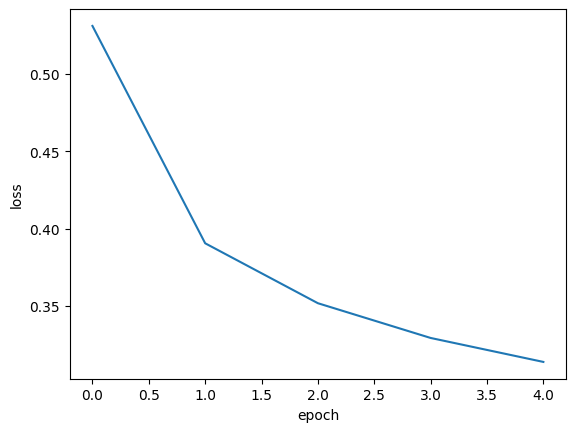

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

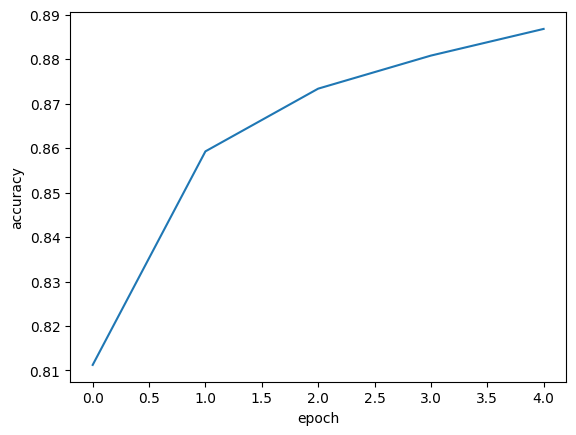

In [ ]:
plt.plot(history.history['accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

In [ ]:
model = model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_scaled, train_target, epochs=20, verbose=0)

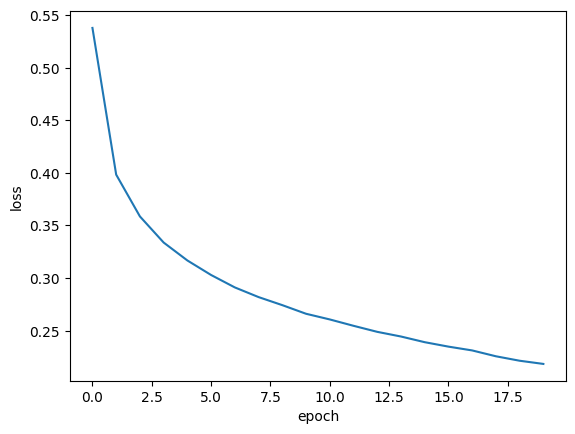

In [ ]:
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

## 검증 손실

In [ ]:
model = model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_scaled, train_target, epochs=20, verbose=0,
                    validation_data=(val_scaled, val_target))

In [ ]:
print(history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


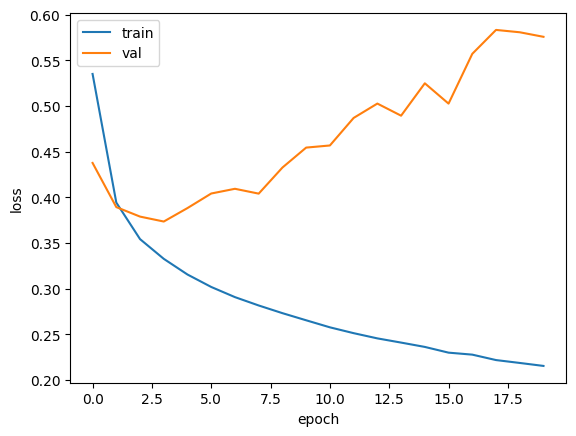

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [ ]:
# 모델 생성 (model_fn 함수에서 정의된 모델 불러오기)
model = model_fn()

# 모델 컴파일 (손실 함수 및 평가 지표 설정)
model.compile(
    loss='sparse_categorical_crossentropy',  # 다중 클래스 분류 문제에서 정수형 라벨을 사용할 때 적합한 손실 함수
    metrics=['accuracy']  # 모델의 성능을 평가할 지표로 정확도(accuracy)를 사용
)

# 모델 학습 (훈련 데이터와 검증 데이터로 신경망 학습 진행)
history = model.fit(
    train_scaled,      # 입력 데이터 (전처리된 훈련 데이터)
    train_target,      # 정답 라벨 (정수형 클래스 값)
    epochs=20,         # 총 20번(에포크) 동안 데이터셋을 반복 학습
    verbose=0,         # 학습 과정 출력 설정 (0: 출력 없음, 1: 상세 출력, 2: 간략 출력)
    validation_data=(val_scaled, val_target)  # 검증 데이터 (훈련 중 과적합 여부 평가)
)


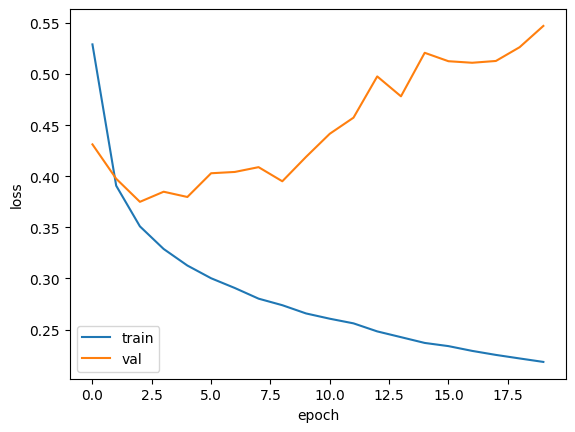

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

## 드롭아웃

In [ ]:
model = model_fn(keras.layers.Dropout(0.3))

model.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_6 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 100)                 │          78,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_scaled, train_target, epochs=20, verbose=0,
                    validation_data=(val_scaled, val_target))

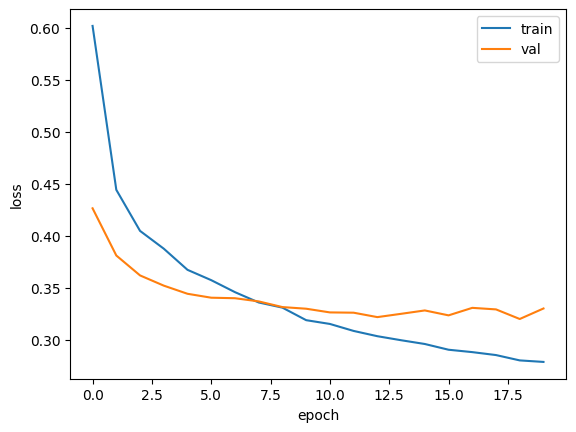

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

## 모델 저장과 복원

In [ ]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_scaled, train_target, epochs=10, verbose=0,
                    validation_data=(val_scaled, val_target))

In [ ]:
model.save('model-whole.keras')

In [ ]:
model.save_weights('model.weights.h5')

In [ ]:
!ls -al model*

-rw-r--r-- 1 root root 976600 Feb 14 16:30 model.weights.h5
-rw-r--r-- 1 root root 979393 Feb 14 16:30 model-whole.keras


In [ ]:
model = model_fn(keras.layers.Dropout(0.3))

model.load_weights('model.weights.h5')

In [ ]:
import numpy as np

val_labels = np.argmax(model.predict(val_scaled), axis=-1)
print(np.mean(val_labels == val_target))

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
0.8810833333333333


In [ ]:
model = keras.models.load_model('model-whole.keras')

model.evaluate(val_scaled, val_target)

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8827 - loss: 0.3282


[0.3353292942047119, 0.8810833096504211]

## 콜백
- 훈련 과정 중에 어떤 작업(조기 종료(Early Stopping), 모델 저장, 학습률 조정 등)을 수행할 수 있게 하는 객체

### **📌사용하는 이유**
1. 훈련 과정 자동 제어
- 모델이 최적의 상태를 유지하도록 학습 과정 중간에 개입 가능.
2. 과적합 방지
- 검증 성능이 떨어지면 학습을 자동으로 멈추거나(Early Stopping), 최적 모델을 저장.
3. 학습 속도 개선
- 학습률(Learning Rate)을 동적으로 조정하여 더 빠르게 최적점에 도달 가능.
4. 로그 기록 및 모니터링
- 학습 과정 데이터를 저장하여 나중에 분석 가능.

### **📌 주요 콜백 종류 및 역할**

| 콜백 이름 | 역할 |
|-----------|-----------------------------------------------------------|
| **EarlyStopping** | 일정 에포크 동안 검증 성능이 개선되지 않으면 학습 중단 |
| **ModelCheckpoint** | 최적 모델을 자동으로 저장 |
| **ReduceLROnPlateau** | 검증 손실이 개선되지 않으면 학습률 감소 |
| **LearningRateScheduler** | 학습률을 특정 스케줄에 따라 조정 |
| **TensorBoard** | 학습 과정을 시각적으로 모니터링 |
| **CSVLogger** | 학습 과정을 CSV 파일로 저장 |

- 여러 개 동시에 사용 가능


In [ ]:
# Dropout을 적용한 모델을 Adam 옵티마이저로 학습하고, 검증 성능이 가장 좋은 모델을 자동 저장

# 모델 생성 (Dropout 레이어 추가) - model_fn 함수에서 모델을 정의하는 것으로 가정
model = model_fn(keras.layers.Dropout(0.3))  # 드롭아웃 비율 30% 적용

# 모델 컴파일 (최적화 알고리즘, 손실 함수, 평가 지표 설정)
model.compile(
    optimizer='adam',  # Adam 최적화 알고리즘 사용 (적응형 학습률 조정)
    loss='sparse_categorical_crossentropy',  # 정수형 클래스 라벨을 위한 다중 클래스 분류 손실 함수
    metrics=['accuracy']  # 모델 평가 지표로 정확도(Accuracy) 사용
)

# 콜백 설정: 최적 모델 자동 저장
checkpoint_cb = keras.callbacks.ModelCheckpoint(
    'best-model.keras',  # 최적 모델이 저장될 파일 경로
    save_best_only=True  # 검증 성능이 가장 좋은 모델만 저장
)

# 모델 학습 (훈련 데이터와 검증 데이터로 학습 진행)
history = model.fit(
    train_scaled,        # 입력 데이터 (전처리된 훈련 데이터)
    train_target,        # 정답 라벨 (정수형 클래스 값)
    epochs=20,           # 총 20번(에포크) 동안 데이터셋을 반복 학습
    verbose=0,           # 학습 과정 출력 설정 (0: 출력 없음, 1: 상세 출력, 2: 간략 출력)
    validation_data=(val_scaled, val_target),  # 검증 데이터 (훈련 중 과적합 여부 평가)
    callbacks=[checkpoint_cb]  # 최적 모델 자동 저장 콜백 적용
)


In [ ]:
model = keras.models.load_model('best-model.keras')

model.evaluate(val_scaled, val_target)

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8855 - loss: 0.3178


[0.32222074270248413, 0.8847500085830688]

In [ ]:
# Dropout을 적용한 모델을 Adam 옵티마이저로 학습하고, 최적 모델을 저장하며, 성능이 향상되지 않으면 조기 종료

# 모델 생성 (Dropout 레이어 추가) - model_fn 함수에서 모델을 정의하는 것으로 가정
model = model_fn(keras.layers.Dropout(0.3))  # 드롭아웃 비율 30% 적용 (과적합 방지)

# 모델 컴파일 (최적화 알고리즘, 손실 함수, 평가 지표 설정)
model.compile(
    optimizer='adam',  # Adam 최적화 알고리즘 사용 (적응형 학습률 조정)
    loss='sparse_categorical_crossentropy',  # 정수형 클래스 라벨을 위한 다중 클래스 분류 손실 함수
    metrics=['accuracy']  # 모델 평가 지표로 정확도(Accuracy) 사용
)

# 콜백 설정 1: 최적 모델 자동 저장 (검증 성능이 가장 좋은 모델을 저장)
checkpoint_cb = keras.callbacks.ModelCheckpoint(
    'best-model.keras',  # 최적 모델이 저장될 파일 경로
    save_best_only=True  # 검증 성능이 개선될 때만 저장
)

# 콜백 설정 2: 조기 종료 (Early Stopping)
early_stopping_cb = keras.callbacks.EarlyStopping(
    patience=2,  # 검증 성능이 2번 연속 개선되지 않으면 학습 조기 종료
    restore_best_weights=True  # 가장 좋은 가중치를 복원하여 최적의 모델 유지
)

# 모델 학습 (훈련 데이터와 검증 데이터로 학습 진행)
history = model.fit(
    train_scaled,        # 입력 데이터 (전처리된 훈련 데이터)
    train_target,        # 정답 라벨 (정수형 클래스 값)
    epochs=20,           # 총 20번(에포크) 동안 데이터셋을 반복 학습
    verbose=0,           # 학습 과정 출력 설정 (0: 출력 없음, 1: 상세 출력, 2: 간략 출력)
    validation_data=(val_scaled, val_target),  # 검증 데이터 (훈련 중 과적합 여부 평가)
    callbacks=[checkpoint_cb, early_stopping_cb]  # 최적 모델 저장 및 조기 종료 콜백 적용
)


In [ ]:
# 몇 번째 에포크에서 훈련이 중지되었는지 확인
print(early_stopping_cb.stopped_epoch)

12


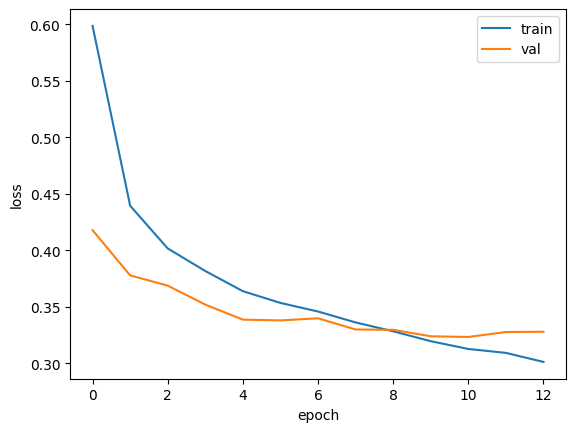

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [ ]:
model.evaluate(val_scaled, val_target)

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8858 - loss: 0.3188


[0.3233264982700348, 0.8853333592414856]